**TASK 1**

In [1]:
import pandas as pd

In [10]:
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


**TASK 2**

In [11]:
yearly['Proportion_deaths'] = yearly['deaths']/yearly['births']

In [12]:
df1 = pd.DataFrame(yearly['Proportion_deaths'])

In [13]:
df1

,Proportion_deaths
0,0.078063
1,0.157591
2,0.089542
3,0.082357
4,0.069015
5,0.114464
6,0.035217
7,0.075968
8,0.059876
9,0.023004


In [14]:
yearly1 = yearly[yearly.clinic == 'clinic 1']
yearly2 = yearly[yearly.clinic == 'clinic 2']

In [16]:
yearly1

,year,births,deaths,clinic,Proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


**TASK 3**

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Proportion deaths')

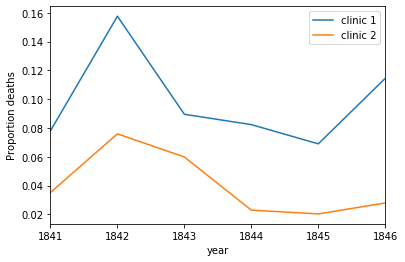

In [22]:
ax = yearly1.plot(x='year', y='Proportion_deaths', label='clinic 1')
yearly2.plot(x='year', y='Proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

**TASK 4**

In [23]:
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

In [24]:
monthly['proportion_deaths'] = monthly.deaths.divide(monthly.births)

In [25]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


**TASK 5**

Text(0, 0.5, 'Proportion deaths')

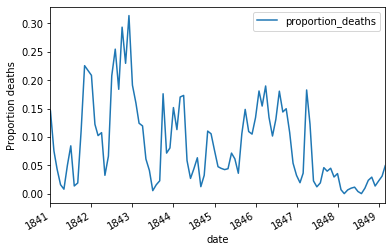

In [27]:
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

**TASK 6**

In [28]:
handwashing_start = pd.to_datetime('1847-06-01')

In [29]:
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

Text(0, 0.5, 'Proportion deaths')

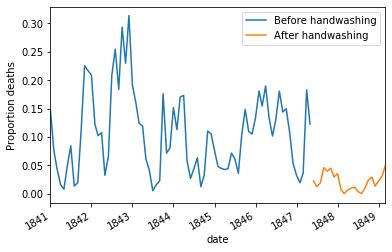

In [30]:
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', label='After handwashing', ax=ax)
ax.set_ylabel('Proportion deaths')

In [31]:
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean() 
print(mean_diff)

-0.0839566075118334


**TASK 8**

In [32]:
from numpy import percentile
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

[-0.10165568 -0.06698911]


**TASK 9**

In [33]:
doctors_should_wash_their_hands = True